In [1]:
import json
import os
from PIL import Image

In [7]:
src = '/media/palm/Data/Liver_Ultrasound_Detection/train/'
outputs = {'images': [], 'annotations': [], 'categories': []}
cats = set()
ann_id = 1
for txt_file in os.listdir(os.path.join(src, 'annotations')):
    if 'txt' not in txt_file:
        continue
    anns = open(os.path.join(src, 'annotations', txt_file)).read().split('\n')
    image = Image.open(os.path.join(src, 'images', txt_file.replace('.txt', '.jpg')))
    width = image.width
    height = image.height
    for line in anns:
        if len(line) == 0:
            continue
        cat, x, y, w, h = line.split(' ')
        x = float(x)
        y = float(y)
        w = float(w)
        h = float(h)
        x1 = (x - w / 2) * width
        y1 = (y - h / 2) * height
        x2 = (x + w / 2) * width
        y2 = (y + h / 2) * height
        outputs['annotations'].append(
            {
                'id': ann_id,
                'image_id': int(txt_file.replace('.txt', '')),
                'iscrowd': 0,
                'bbox': [x1, y1, w * width, h * height],
                'area': w * width * h * height,
                'category_id': int(cat)
            }
        )
        ann_id += 1
        cats.add(cat)
    outputs['images'].append(
        {
            'file_name': txt_file.replace('.txt', '.jpg'),
            'filename': txt_file.replace('.txt', '.jpg'),
            'height': height,
            'width': width,
            'id': int(txt_file.replace('.txt', ''))
        }
    )

for cat in cats:
    outputs['categories'].append(
        {
            'supercategory': cat,
            'id': int(cat),
            'name': cat
        }
    )


In [8]:
outputs['categories']

[{'supercategory': '5', 'id': 5, 'name': '5'},
 {'supercategory': '2', 'id': 2, 'name': '2'},
 {'supercategory': '0', 'id': 0, 'name': '0'},
 {'supercategory': '1', 'id': 1, 'name': '1'},
 {'supercategory': '3', 'id': 3, 'name': '3'},
 {'supercategory': '6', 'id': 6, 'name': '6'},
 {'supercategory': '4', 'id': 4, 'name': '4'}]

In [9]:
json.dump(
    outputs,
    open('/media/palm/Data/Liver_Ultrasound_Detection/annotations.json', 'w')
)

In [2]:
%cd /project/lt200203-aimedi/palm/mmdetection/

/lustrefs/disk/project/lt200203-aimedi/palm/mmdetection


In [1]:
from mmengine.config import Config
from matplotlib import pyplot as plt
from mmengine.fileio import list_dir_or_file
from mmengine.runner import Runner


In [3]:
cfg = Config.fromfile('/project/lt200203-aimedi/fahsai/traffic/traffic_mmdet/traffic_config/co_dino_5scale_swin_l_lsj_16xb1_3x_coco.py')

In [5]:
cfg.work_dir = '/tmp'
runner = Runner.from_cfg(cfg)

06/04 13:12:06 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.19 | packaged by conda-forge | (default, Mar 20 2024, 12:47:35) [GCC 12.3.0]
    CUDA available: True
    MUSA available: False
    numpy_random_seed: 2102184180
    GPU 0: NVIDIA A100-SXM4-40GB
    CUDA_HOME: None
    GCC: gcc (SUSE Linux) 7.5.0
    PyTorch: 1.13.1+cu116
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.6
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,c

/project/lt200203-aimedi/palm/conda_envs/.conda/envs/palm_mmdet/lib/python3.8/site-packages/mmdet/models/dense_heads/anchor_head.py:108: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '


06/04 13:12:27 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/04 13:12:27 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

In [5]:
cfg['model']

{'type': 'CoDETR',
 'use_lsj': True,
 'eval_module': 'detr',
 'data_preprocessor': {'type': 'DetDataPreprocessor',
  'mean': [123.675, 116.28, 103.53],
  'std': [58.395, 57.12, 57.375],
  'bgr_to_rgb': True,
  'pad_mask': True,
  'batch_augments': [{'type': 'BatchFixedSizePad',
    'size': (1280, 1280),
    'pad_mask': True}]},
 'backbone': {'type': 'SwinTransformer',
  'pretrain_img_size': 384,
  'embed_dims': 192,
  'depths': [2, 2, 18, 2],
  'num_heads': [6, 12, 24, 48],
  'window_size': 12,
  'mlp_ratio': 4,
  'qkv_bias': True,
  'qk_scale': None,
  'drop_rate': 0.0,
  'attn_drop_rate': 0.0,
  'drop_path_rate': 0.5,
  'patch_norm': True,
  'out_indices': (0, 1, 2, 3),
  'with_cp': False,
  'convert_weights': True,
  'init_cfg': {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}},
 'neck': {'type': 'ChannelMapper',
  'in_channels': [192, 384, 768, 1536],
  'kernel_size': 1,
  'out_channels': 256,
  'act_cfg': None,
  'norm_cfg': {'type': 'GN', 'num_groups': 32},
  'num_o

In [38]:
from mmdet.apis import DetInferencer
import os
# Choose to use a config
model_name = '/project/lt200203-aimedi/palm/liver-kaggle/mmdet_cfgs/co_dino_swin_l.py'
# Setup a checkpoint file to load
checkpoint = '/project/lt200203-aimedi/palm/liver-kaggle/work_dirs/co_dino_swin_l/epoch_13.pth'

# Set the device to be used for evaluation
device = 'cuda:0'

# Initialize the DetInferencer
inferencer = DetInferencer(model_name, checkpoint, device)


Loads checkpoint by local backend from path: /project/lt200203-aimedi/palm/liver-kaggle/work_dirs/co_dino_swin_l/epoch_13.pth
05/28 12:02:00 - mmengine - INFO - 
rpn_conv.weight - torch.Size([256, 256, 3, 3]): 
NormalInit: mean=0, std=0.01, bias=0 
 
05/28 12:02:00 - mmengine - INFO - 
rpn_conv.bias - torch.Size([256]): 
NormalInit: mean=0, std=0.01, bias=0 
 
05/28 12:02:00 - mmengine - INFO - 
rpn_cls.weight - torch.Size([9, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
05/28 12:02:00 - mmengine - INFO - 
rpn_cls.bias - torch.Size([9]): 
NormalInit: mean=0, std=0.01, bias=0 
 
05/28 12:02:00 - mmengine - INFO - 
rpn_reg.weight - torch.Size([36, 256, 1, 1]): 
NormalInit: mean=0, std=0.01, bias=0 
 
05/28 12:02:00 - mmengine - INFO - 
rpn_reg.bias - torch.Size([36]): 
NormalInit: mean=0, std=0.01, bias=0 
 
05/28 12:02:00 - mmengine - INFO - 
bbox_head.fc_cls.weight - torch.Size([8, 1024]): 
NormalInit: mean=0, std=0.01, bias=0 
 
05/28 12:02:00 - mmengine - INFO - 
bbox_head.f

/project/lt200203-aimedi/palm/conda_envs/.conda/envs/palm_mmdet/lib/python3.8/site-packages/mmdet/models/dense_heads/anchor_head.py:108: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '
/project/lt200203-aimedi/palm/conda_envs/.conda/envs/palm_mmdet/lib/python3.8/site-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


In [18]:
img = '/project/lt200203-aimedi/palm/liver-kaggle/test/test/'
result = inferencer(
    img, 
    # out_dir='./output',
    # show=True
    )
file_list = list_dir_or_file(img)

Output()

In [42]:
src = '/project/lt200203-aimedi/palm/liver-kaggle/test/test'
outputs = {}

In [43]:

# Use the detector to do inference
for file in os.listdir(src):
    if file in outputs or '.jpg' not in file:
        continue
    img = os.path.join(src, file)
        
    batch_size = 1
    return_vis = False
    show = False
    wait_time = 0
    no_save_vis = False
    draw_pred = True
    pred_score_thr = 0.3
    return_datasample = False
    print_result = False
    no_save_pred = True
    out_dir = ''
    
    ori_inputs = inferencer._inputs_to_list(img)
    inputs = inferencer.preprocess(
        ori_inputs, batch_size=batch_size, )

    results_dict = {'predictions': [], 'visualization': []}
    for ori_inputs, data in inputs:
        preds = inferencer.forward(data, )
        visualization = inferencer.visualize(
            ori_inputs,
            preds,
            return_vis=return_vis,
            show=show,
            wait_time=wait_time,
            draw_pred=draw_pred,
            pred_score_thr=pred_score_thr,
            no_save_vis=no_save_vis,
            img_out_dir=out_dir,
            )
        results = inferencer.postprocess(
            preds,
            visualization,
            return_datasample=return_datasample,
            print_result=print_result,
            no_save_pred=no_save_pred,
            pred_out_dir=out_dir,
            )
        results_dict['predictions'].extend(results['predictions'])
    result = results_dict['predictions'][0]
    outputs[file] = result
    # break


In [44]:
import json
json.dump(outputs, open('outputs/co_dino_swin_l.json', 'w'))

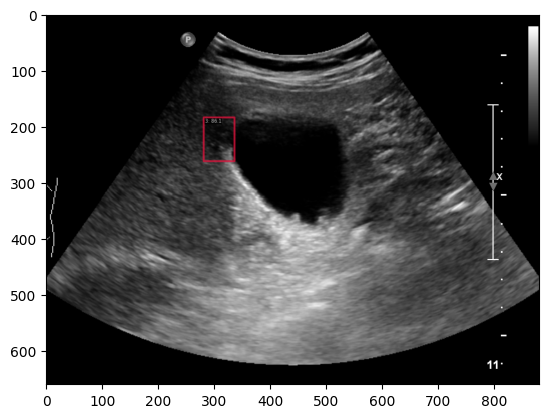

In [19]:
plt.imshow(result['visualization'][0])

In [1]:
from transformers import AutoConfig, AutoModelForObjectDetection

ModuleNotFoundError: No module named 'transformers'

In [ ]:
model_repo = "/project/lt200203-aimedi/fahsai/traffic/Conditional_DETR/detr_finetuned_coco/checkpoint-87954"

In [ ]:
cfg = AutoConfig.from_pretrained(model_repo)

In [ ]:
model = AutoModelForObjectDetection.from_pretrained(model_repo, use_safetensors=True, use_pretrained_backbone=False)

In [1]:
!which jupyter

/media/palm/BiggerData/conda/capgen/bin/jupyter


In [33]:
import torch

In [34]:
torch.__version__

'2.0.1+cu117'